In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

import pickle

import matplotlib

matplotlib.rcParams['text.usetex'] = True

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
dataset = 'sim-pred-prey-100-16-50-100-100-0'
root = '../../experiments/predator-prey/results'

In [3]:
models = [
    ['convGNP', 'meanfield', 'hetero', 'identity'],
    ['convGNP', 'meanfield', 'hetero', 'exponential'],
    ['convGNP', 'innerprod', 'hetero', 'identity'],
    ['convGNP', 'innerprod', 'hetero', 'exponential'],
    ['convGNP', 'kvv', 'hetero', 'identity'],
    ['convGNP', 'kvv', 'hetero', 'exponential'],
    ['convNP', 'meanfield', 'homo', 'identity'],
    ['FullConvGNP', 'meanfield', 'homo', 'identity']
]

model_names = [
    'convgnp-meanfield-identity',
    'convgnp-meanfield-exponential',
    'convgnp-innerprod-identity',
    'convgnp-innerprod-exponential',
    'convgnp-kvv-identity',
    'convgnp-kvv-exponential',
    'convnp-meanfield',
    'fullconvgnp-meanfield',
]

In [8]:
# def get_model_log_likelihood(root, dataset, model, cov, noise, marginal):
    
#     filename = f'{root}/{dataset}/models/{model}/{cov}/{noise}/{marginal}/seed-0/test_log_likelihood.txt'
    
#     file = open(filename, 'r')
#     nll = file.read()[:-2]
    
#     return -float(nll)

In [9]:
markers = ['^',
           'D',
           '^',
           'D',
           '^',
           'D',
           'X',
           '*']

colors = ['tab:red',
          'tab:red',
          'tab:green',
          'tab:green',
          'tab:blue',
          'tab:blue',
          'tab:purple',
          'tab:orange']

legend_labels = ['ConvGNP (meanfield)  ',
                 'ConvGCNP (meanfield)',
                 'ConvGNP (linear)  ',
                 'ConvGCNP (linear)',
                 'ConvGNP (kvv)  ',
                 'ConvGCNP (kvv)',
                 'ConvNP',
                 'FullConvGNP']

In [11]:
# results = {}
    
# for model_name, (model, cov, noise, marginal) in zip(model_names, models):

#     loglik = get_model_log_likelihood(root=root,
#                                       dataset=dataset,
#                                       model=model,
#                                       cov=cov,
#                                       noise=noise,
#                                       marginal=marginal)

#     results[model_name] = loglik

# with open('pred-prey-results.pkl', 'wb') as file:
#     pickle.dump(results, file)

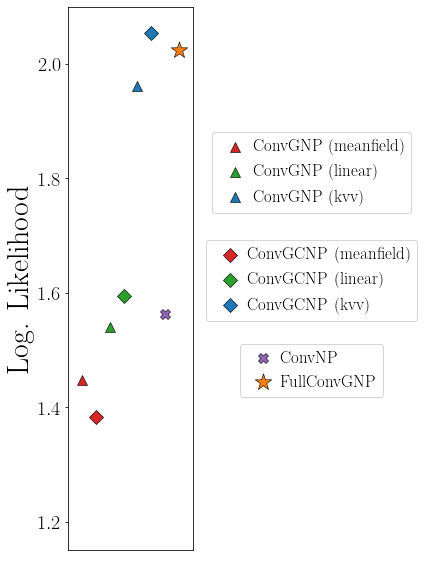

In [59]:
results = None
with open('pred-prey-results.pkl', 'rb') as file:
    results = pickle.load(file)
    
fig = plt.figure(figsize=(3, 10))

for j, (model_name, (model, cov, noise, marginal), (marker, color)) in enumerate(zip(model_names, models, zip(markers, colors))):

    loglik = results[model_name]

    s = 300 if model_name == 'fullconvgnp-meanfield' else 100
    
    plt.scatter(j,
                loglik,
                marker=marker,
                c=color,
                zorder=2,
                s=s,
                linewidth=0.6,
                edgecolor='k',
                label=legend_labels[j])

# plt.title(f'Predator prey', fontsize=28)
plt.xticks([])
plt.yticks(np.linspace(1.2, 2.0, 5), fontsize=20)
plt.xlim([-1., 8.])
plt.ylim([1.15, 2.1])

plt.ylabel('Log. Likelihood', fontsize=30)

handles, labels = plt.gca().get_legend_handles_labels()

fig.legend(handles[:-2][::2], labels[:-2][::2], loc='center', ncol=1, fontsize=17, bbox_to_anchor=(1., 0.0, 0.5, 1.3), handletextpad=0.01, columnspacing=2.0)
fig.legend(handles[1:-2][::2], labels[1:-2][::2], loc='center', ncol=1, fontsize=17, bbox_to_anchor=(1., 0.0, 0.5, 1.0), handletextpad=0.01, columnspacing=2.0)
fig.legend(handles[-2:], labels[-2:], loc='center', ncol=1, fontsize=17, bbox_to_anchor=(1., 0.0, 0.5, 0.75), handletextpad=0.01, columnspacing=2.0)

plt.gcf().subplots_adjust(right=0.7)
plt.savefig('pred-prey-results.pdf', bbox_inches='tight')
plt.show()